In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv('/content/train_pm.csv')
print(dataset.head())

               date  pm2_5
0  30-11-2020 00:00   6.75
1  01-12-2020 00:00  83.53
2  02-12-2020 00:00  79.53
3  03-12-2020 00:00  60.84
4  04-12-2020 00:00  26.25


In [ ]:
train_set = dataset.iloc[:, 1:2].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scale_train_set = scaler.fit_transform(train_set)

In [ ]:
len(scale_train_set)

678

In [ ]:
X_train = []
Y_train = []

In [ ]:
for i in range(60, 678):
    X_train.append(scale_train_set[i - 60:i, 0])
    Y_train.append(scale_train_set[i, 0])

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(618, 60, 1)
(618,)


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
20/20 [==============================] - 22s 180ms/step - loss: 0.0285
Epoch 2/100
20/20 [==============================] - 2s 101ms/step - loss: 0.0221
Epoch 3/100
20/20 [==============================] - 2s 101ms/step - loss: 0.0215
Epoch 4/100
20/20 [==============================] - 2s 98ms/step - loss: 0.0213
Epoch 5/100
20/20 [==============================] - 3s 150ms/step - loss: 0.0217
Epoch 6/100
20/20 [==============================] - 2s 100ms/step - loss: 0.0219
Epoch 7/100
20/20 [==============================] - 2s 101ms/step - loss: 0.0226
Epoch 8/100
20/20 [==============================] - 2s 102ms/step - loss: 0.0209
Epoch 9/100
20/20 [==============================] - 2s 99ms/step - loss: 0.0208
Epoch 10/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0205
Epoch 11/100
20/20 [==============================] - 3s 144ms/step - loss: 0.0211
Epoch 12/100
20/20 [==============================] - 2s 101ms/step - loss: 0.0206
Epoch 13/100
2

In [ ]:
dataset_test = pd.read_csv("/content/train_pm.csv")

In [ ]:
actual_value = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset['pm2_5'], dataset_test['pm2_5']), axis=0)

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
print(len(dataset_total))
print(len(dataset_test))
a=len(inputs)
print(a)

904
226
286


In [ ]:
inputs = inputs.reshape(-1, 1)

In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
X_test = []

In [ ]:
for i in range(60,286):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_test.shape)

(226, 60, 1)


In [ ]:
prec_stp = regressor.predict(X_test)
prec_stp = scaler.inverse_transform(prec_stp)

8/8 [==============================] - 2s 27ms/step


In [ ]:
len(prec_stp)

226

In [ ]:
a=prec_stp.tolist()
flat_list = []

for i in a:
    for j in i:
        flat_list.append(j)

In [ ]:
dataset_test['date'] = pd.to_datetime( dataset_test['date'],dayfirst=True)
dataset['date'] = pd.to_datetime( dataset['date'],dayfirst=True)

In [ ]:
# Create a DataFrame with the dates and predicted values
pred_df = pd.DataFrame({'Dates': dataset_test['date'] , 'Prediction': flat_list})
pred_df.set_index('Dates', inplace=True)

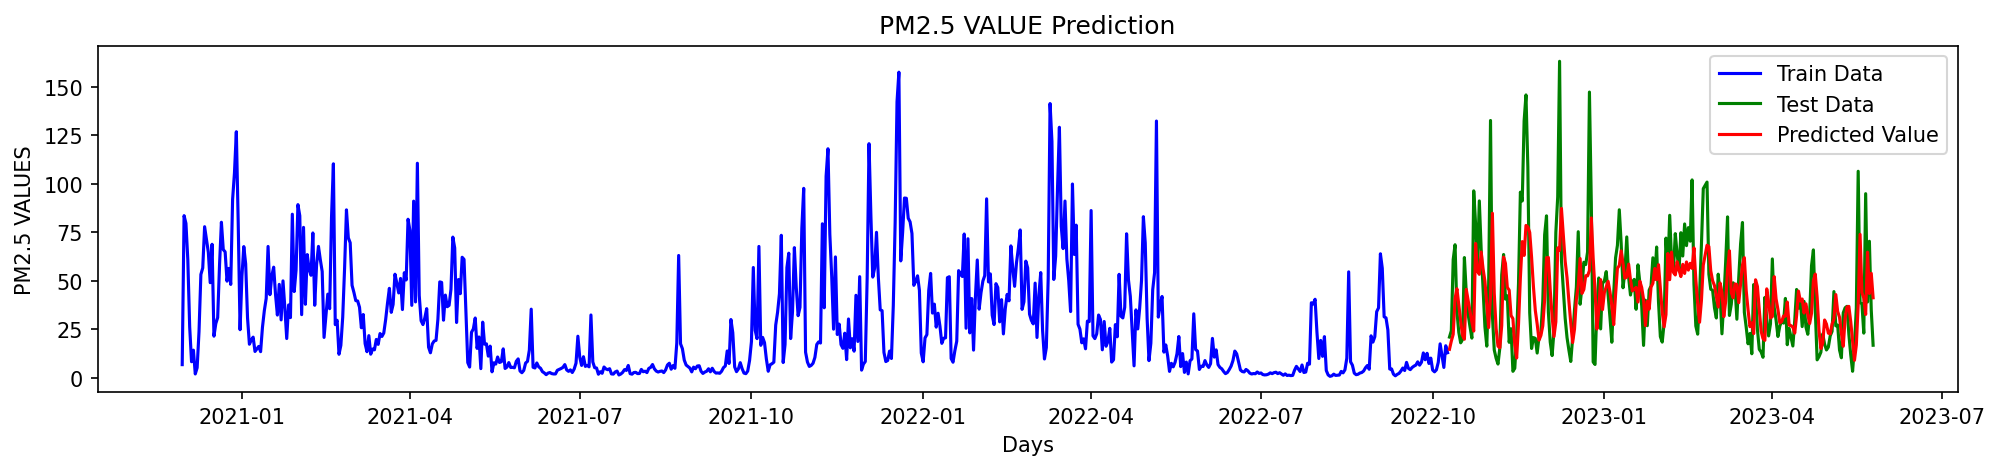

In [ ]:
plt.figure(figsize=(16, 3), dpi=150)

plt.plot(dataset['date'],dataset['pm2_5'], color='blue', label='Train Data')
plt.plot(dataset_test['date'],dataset_test['pm2_5'], color='green', label='Test Data')
plt.plot(pred_df.index,pred_df['Prediction'], color='red', label='Predicted Value')
plt.title('PM2.5 VALUE Prediction')

# adding Labels and legend
plt.xlabel('Days')
plt.ylabel('PM2.5 VALUES')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
expected=actual_value
predictions=prec_stp
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mape = mean_absolute_percentage_error(expected, predictions)
print('MAPE: %f' % mape)
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' %mae)

RMSE: 24.018267
MAPE: 0.617044
MAE: 17.931374


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv('/content/train_o3.csv')
print(dataset.head())

         date     o3
0  30-11-2020  76.53
1  01-12-2020  75.10
2  02-12-2020  71.53
3  03-12-2020  75.82
4  04-12-2020  63.66


In [ ]:
train_set = dataset.iloc[:, 1:2].values
train_set

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scale_train_set = scaler.fit_transform(train_set)

In [ ]:
len(scale_train_set)

678

In [ ]:
X_train = []
Y_train = []

In [ ]:
for i in range(60, 678):
    X_train.append(scale_train_set[i - 60:i, 0])
    Y_train.append(scale_train_set[i, 0])

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(618, 60, 1)
(618,)


In [ ]:
regressor = Sequential()

In [ ]:
X_train.shape

(618, 60, 1)

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
20/20 [==============================] - 10s 107ms/step - loss: 0.0386
Epoch 2/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0277
Epoch 3/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0248
Epoch 4/100
20/20 [==============================] - 3s 140ms/step - loss: 0.0234
Epoch 5/100
20/20 [==============================] - 3s 130ms/step - loss: 0.0239
Epoch 6/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0233
Epoch 7/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0231
Epoch 8/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0232
Epoch 9/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0226
Epoch 10/100
20/20 [==============================] - 3s 163ms/step - loss: 0.0231
Epoch 11/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0219
Epoch 12/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0225
Epoch 13/100

In [ ]:
dataset_test = pd.read_csv("/content/test_o3.csv")

In [ ]:
actual_value = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset['o3'], dataset_test['o3']), axis=0)

In [ ]:
print(actual_value)

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

In [ ]:
print(len(dataset_total))
print(len(dataset_test))
a=len(inputs)
print(a)

904
226
286


In [ ]:
inputs = inputs.reshape(-1, 1)

In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
X_test = []

In [ ]:
in_ = dataset['o3']

In [ ]:
for i in range(60,286):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_test.shape)

(226, 60, 1)


In [ ]:
prec_stp = regressor.predict(X_test)
prec_stp = scaler.inverse_transform(prec_stp)

8/8 [==============================] - 2s 33ms/step


In [ ]:
len(prec_stp)

In [ ]:
a=prec_stp.tolist()
flat_list = []

for i in a:
    for j in i:
        flat_list.append(j)

In [ ]:
dataset_test['date'] = pd.to_datetime( dataset_test['date'],dayfirst=True)  #,format='%d%m%Y %H:%M:%S'
dataset['date'] = pd.to_datetime( dataset['date'],dayfirst=True)

In [ ]:
# Create a DataFrame with the dates and predicted values
pred_df = pd.DataFrame({'Dates': dataset_test['date'] , 'Prediction': flat_list})
pred_df.set_index('Dates', inplace=True)

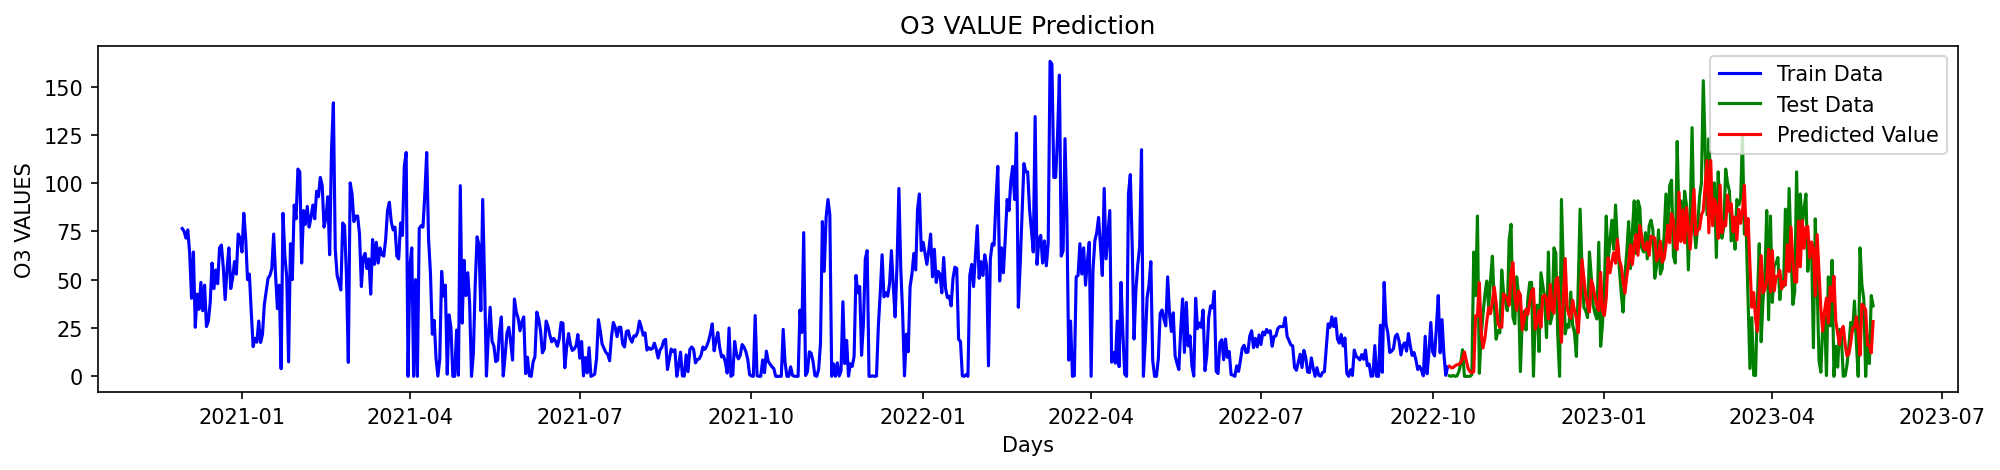

In [ ]:
plt.figure(figsize=(16, 3), dpi=150)

plt.plot(dataset['date'],dataset['o3'], color='blue', label='Train Data')
plt.plot(dataset_test['date'],dataset_test['o3'], color='green', label='Test Data')
plt.plot(pred_df.index,pred_df['Prediction'], color='red', label='Predicted Value')
plt.title('O3 VALUE Prediction')

# adding Labels and legend
plt.xlabel('Days')
plt.ylabel('O3 VALUES')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
expected=actual_value
predictions=prec_stp
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mape = mean_absolute_percentage_error(expected, predictions)
print('MAPE: %f' % mape)
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' %mae)

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv('/content/train_no2.csv')
print(dataset.head())

         date    no2
0  30-11-2020   6.34
1  01-12-2020   7.80
2  02-12-2020  10.63
3  03-12-2020   7.97
4  04-12-2020   6.00


In [ ]:
train_set = dataset.iloc[:, 1:2].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scale_train_set = scaler.fit_transform(train_set)

In [ ]:
len(scale_train_set)

678

In [ ]:
X_train = []
Y_train = []

In [ ]:
for i in range(60, 678):
    X_train.append(scale_train_set[i - 60:i, 0])
    Y_train.append(scale_train_set[i, 0])

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(618, 60, 1)
(618,)


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
20/20 [==============================] - 11s 92ms/step - loss: 0.0194
Epoch 2/100
20/20 [==============================] - 2s 92ms/step - loss: 0.0179
Epoch 3/100
20/20 [==============================] - 2s 123ms/step - loss: 0.0175
Epoch 4/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0175
Epoch 5/100
20/20 [==============================] - 2s 90ms/step - loss: 0.0180
Epoch 6/100
20/20 [==============================] - 2s 94ms/step - loss: 0.0174
Epoch 7/100
20/20 [==============================] - 2s 91ms/step - loss: 0.0176
Epoch 8/100
20/20 [==============================] - 2s 90ms/step - loss: 0.0179
Epoch 9/100
20/20 [==============================] - 2s 107ms/step - loss: 0.0177
Epoch 10/100
20/20 [==============================] - 3s 127ms/step - loss: 0.0174
Epoch 11/100
20/20 [==============================] - 2s 91ms/step - loss: 0.0177
Epoch 12/100
20/20 [==============================] - 2s 91ms/step - loss: 0.0178
Epoch 13/100
20/20 [

In [ ]:
dataset_test = pd.read_csv("/content/test_no2.csv")

In [ ]:
actual_value = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset['no2'], dataset_test['no2']), axis=0)

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
print(len(dataset_total))
print(len(dataset_test))
a=len(inputs)
print(a)

904
226
286


In [ ]:
inputs = inputs.reshape(-1, 1)

In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
X_test = []

In [ ]:
for i in range(60,286):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_test.shape)

(226, 60, 1)


In [ ]:
prec_stp = regressor.predict(X_test)
prec_stp = scaler.inverse_transform(prec_stp)

8/8 [==============================] - 2s 37ms/step


In [ ]:
a=prec_stp.tolist()
flat_list = []

for i in a:
    for j in i:
        flat_list.append(j)

In [ ]:
dataset_test['date'] = pd.to_datetime( dataset_test['date'],dayfirst=True)
dataset['date'] = pd.to_datetime( dataset['date'],dayfirst=True)

In [ ]:
# Create a DataFrame with the dates and predicted values
pred_df = pd.DataFrame({'Dates': dataset_test['date'] , 'Prediction': flat_list})
pred_df.set_index('Dates', inplace=True)

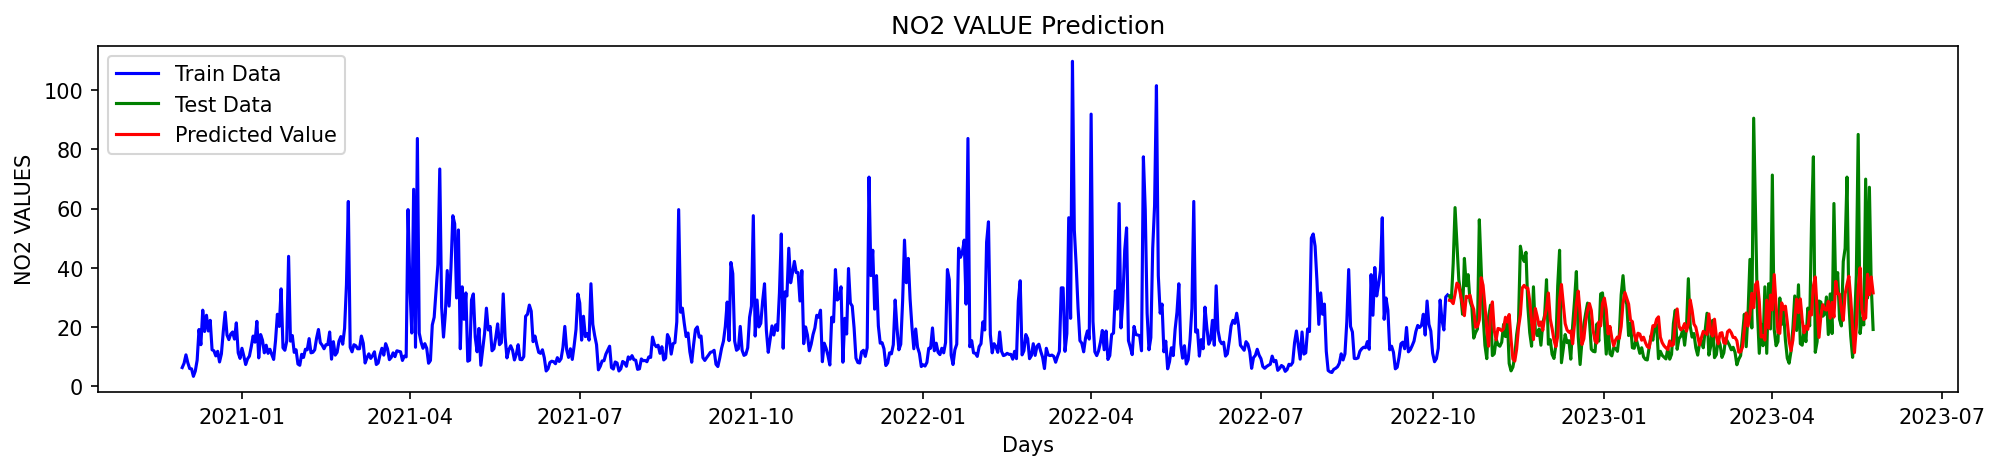

In [ ]:
plt.figure(figsize=(16, 3), dpi=150)

plt.plot(dataset['date'],dataset['no2'], color='blue', label='Train Data')
plt.plot(dataset_test['date'],dataset_test['no2'], color='green', label='Test Data')
plt.plot(pred_df.index,pred_df['Prediction'], color='red', label='Predicted Value')
plt.title('NO2 VALUE Prediction')

# adding Labels and legend
plt.xlabel('Days')
plt.ylabel('NO2 VALUES')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
expected=actual_value
predictions=prec_stp
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mape = mean_absolute_percentage_error(expected, predictions)
print('MAPE: %f' % mape)
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' %mae)

RMSE: 12.991425
MAPE: 0.455379
MAE: 8.983408


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv('/content/train_so2.csv')
print(dataset.head())

         date   so2
0  30-11-2020  4.89
1  01-12-2020  3.93
2  02-12-2020  4.65
3  03-12-2020  4.53
4  04-12-2020  2.89


In [ ]:
train_set = dataset.iloc[:, 1:2].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scale_train_set = scaler.fit_transform(train_set)

In [ ]:
len(scale_train_set)

678

In [ ]:
X_train = []
Y_train = []

In [ ]:
for i in range(60, 678):
    X_train.append(scale_train_set[i - 60:i, 0])
    Y_train.append(scale_train_set[i, 0])

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(618, 60, 1)
(618,)


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
20/20 [==============================] - 12s 116ms/step - loss: 0.0226
Epoch 2/100
20/20 [==============================] - 2s 103ms/step - loss: 0.0164
Epoch 3/100
20/20 [==============================] - 3s 145ms/step - loss: 0.0151
Epoch 4/100
20/20 [==============================] - 2s 118ms/step - loss: 0.0158
Epoch 5/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0153
Epoch 6/100
20/20 [==============================] - 2s 99ms/step - loss: 0.0150
Epoch 7/100
20/20 [==============================] - 2s 104ms/step - loss: 0.0151
Epoch 8/100
20/20 [==============================] - 2s 103ms/step - loss: 0.0150
Epoch 9/100
20/20 [==============================] - 3s 154ms/step - loss: 0.0154
Epoch 10/100
20/20 [==============================] - 2s 108ms/step - loss: 0.0149
Epoch 11/100
20/20 [==============================] - 2s 104ms/step - loss: 0.0151
Epoch 12/100
20/20 [==============================] - 2s 110ms/step - loss: 0.0147
Epoch 13/100


In [ ]:
dataset_test = pd.read_csv("/content/test_so2.csv")

In [ ]:
actual_value = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset['so2'], dataset_test['so2']), axis=0)

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
inputs = inputs.reshape(-1, 1)

In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
X_test = []

In [ ]:
for i in range(60,286):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_test.shape)

(226, 60, 1)


In [ ]:
prec_stp = regressor.predict(X_test)
prec_stp = scaler.inverse_transform(prec_stp)

8/8 [==============================] - 2s 25ms/step


In [ ]:
a=prec_stp.tolist()
flat_list = []

for i in a:
    for j in i:
        flat_list.append(j)

In [ ]:
dataset_test['date'] = pd.to_datetime( dataset_test['date'],dayfirst=True)
dataset['date'] = pd.to_datetime( dataset['date'],dayfirst=True)

In [ ]:
# Create a DataFrame with the dates and predicted values
pred_df = pd.DataFrame({'Dates': dataset_test['date'] , 'Prediction': flat_list})
pred_df.set_index('Dates', inplace=True)

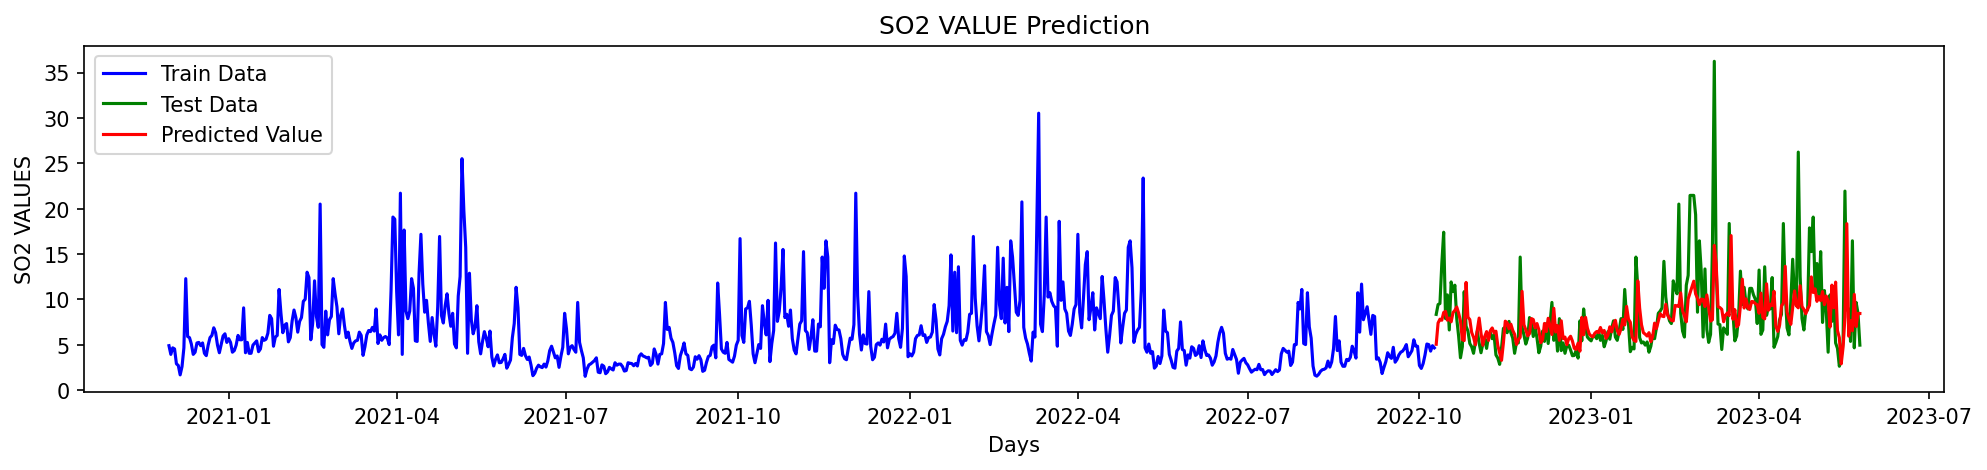

In [ ]:
plt.figure(figsize=(16, 3), dpi=150)

plt.plot(dataset['date'],dataset['so2'], color='blue', label='Train Data')
plt.plot(dataset_test['date'],dataset_test['so2'], color='green', label='Test Data')
plt.plot(pred_df.index,pred_df['Prediction'], color='red', label='Predicted Value')
plt.title('SO2 VALUE Prediction')

# adding Labels and legend
plt.xlabel('Days')
plt.ylabel('SO2 VALUES')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
expected=actual_value
predictions=prec_stp
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mape = mean_absolute_percentage_error(expected, predictions)
print('MAPE: %f' % mape)
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' %mae)

RMSE: 3.883569
MAPE: 0.302672
MAE: 2.562666


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv('/content/train_co.csv')
print(dataset.head())

         date      co
0  30-11-2020  317.10
1  01-12-2020  480.65
2  02-12-2020  500.68
3  03-12-2020  373.84
4  04-12-2020  447.27


In [ ]:
train_set = dataset.iloc[:, 1:2].values

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scale_train_set = scaler.fit_transform(train_set)

In [ ]:
len(scale_train_set)

678

In [ ]:
X_train = []
Y_train = []

In [ ]:
for i in range(60, 678):
    X_train.append(scale_train_set[i - 60:i, 0])
    Y_train.append(scale_train_set[i, 0])

In [ ]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(618, 60, 1)
(618,)


In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
20/20 [==============================] - 7s 62ms/step - loss: 0.0139
Epoch 2/100
20/20 [==============================] - 1s 62ms/step - loss: 0.0130
Epoch 3/100
20/20 [==============================] - 1s 62ms/step - loss: 0.0132
Epoch 4/100
20/20 [==============================] - 1s 62ms/step - loss: 0.0130
Epoch 5/100
20/20 [==============================] - 1s 61ms/step - loss: 0.0130
Epoch 6/100
20/20 [==============================] - 1s 62ms/step - loss: 0.0130
Epoch 7/100
20/20 [==============================] - 1s 63ms/step - loss: 0.0131
Epoch 8/100
20/20 [==============================] - 2s 76ms/step - loss: 0.0130
Epoch 9/100
20/20 [==============================] - 2s 85ms/step - loss: 0.0128
Epoch 10/100
20/20 [==============================] - 1s 76ms/step - loss: 0.0131
Epoch 11/100
20/20 [==============================] - 1s 61ms/step - loss: 0.0129
Epoch 12/100
20/20 [==============================] - 1s 62ms/step - loss: 0.0128
Epoch 13/100
20/20 [=====

In [ ]:
dataset_test = pd.read_csv("/content/test_co.csv")

In [ ]:
actual_value = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset['co'], dataset_test['co']), axis=0)

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
inputs = inputs.reshape(-1, 1)

In [ ]:
inputs = scaler.transform(inputs)

In [ ]:
X_test = []

In [ ]:
for i in range(60,286):
    X_test.append(inputs[i - 60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
print(X_test.shape)

(226, 60, 1)


In [ ]:
prec_stp = regressor.predict(X_test)
prec_stp = scaler.inverse_transform(prec_stp)

8/8 [==============================] - 1s 16ms/step


In [ ]:
a=prec_stp.tolist()
flat_list = []

for i in a:
    for j in i:
        flat_list.append(j)

In [ ]:
dataset_test['date'] = pd.to_datetime( dataset_test['date'],dayfirst=True)
dataset['date'] = pd.to_datetime( dataset['date'],dayfirst=True)

In [ ]:
# Create a DataFrame with the dates and predicted values
pred_df = pd.DataFrame({'Dates': dataset_test['date'] , 'Prediction': flat_list})
pred_df.set_index('Dates', inplace=True)

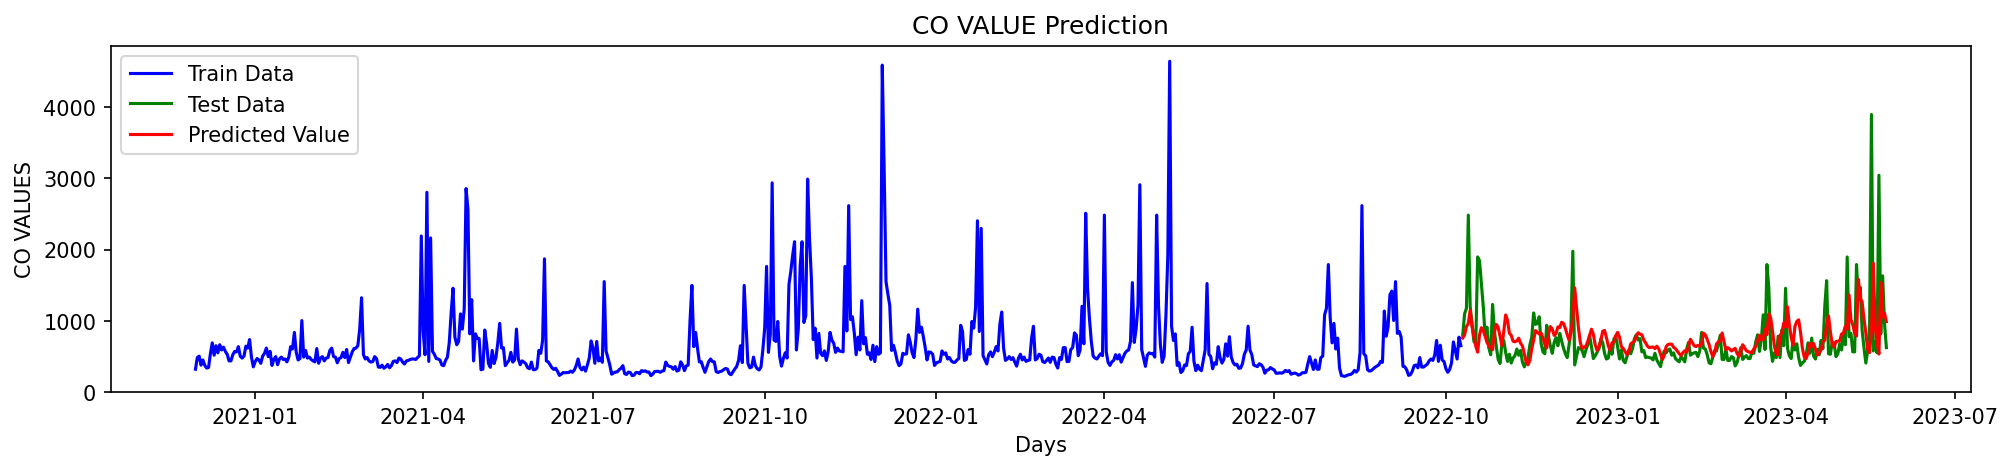

In [ ]:
plt.figure(figsize=(16, 3), dpi=150)

plt.plot(dataset['date'],dataset['co'], color='blue', label='Train Data')
plt.plot(dataset_test['date'],dataset_test['co'], color='green', label='Test Data')
plt.plot(pred_df.index,pred_df['Prediction'], color='red', label='Predicted Value')
plt.title('CO VALUE Prediction')

# adding Labels and legend
plt.xlabel('Days')
plt.ylabel('CO VALUES')
plt.legend()

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
expected=actual_value
predictions=prec_stp
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mape = mean_absolute_percentage_error(expected, predictions)
print('MAPE: %f' % mape)
mae = mean_absolute_error(expected, predictions)
print('MAE: %f' %mae)

RMSE: 3.883569
MAPE: 0.302672
MAE: 2.562666
